# Data preprocessing

This notebook is focused on analyzing and preprocessing a dataset related to student depression. The goal is to explore the data, clean it as necessary, and prepare it for machine learning models to predict the depression level of a student based on some key features.

## Dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle
import seaborn as sns

Creation of the dataset variable:

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Exploration of the dataset:

In [3]:
df.info()
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Analysis and visualization of the features:

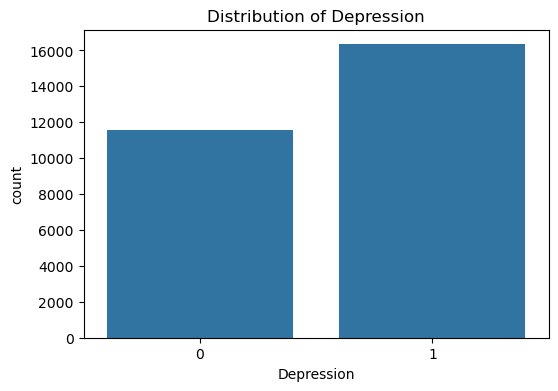

Class distribution:
Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


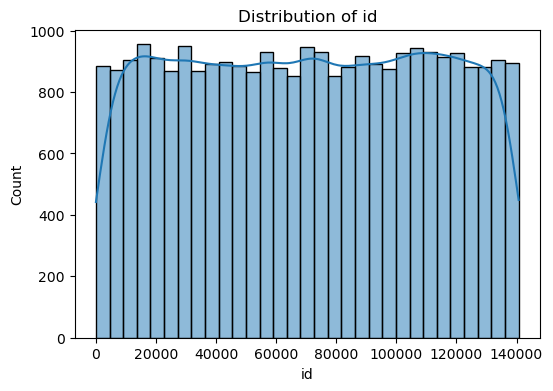

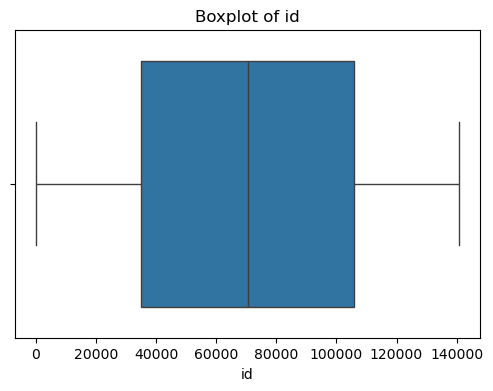

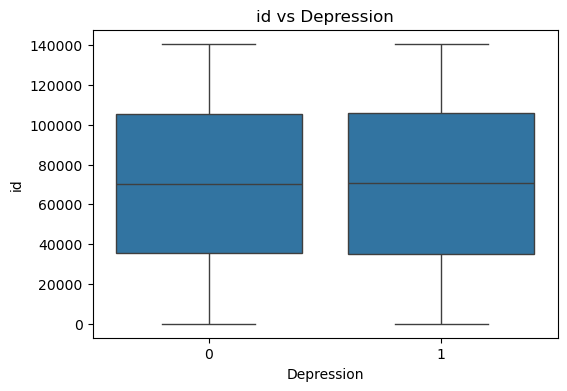

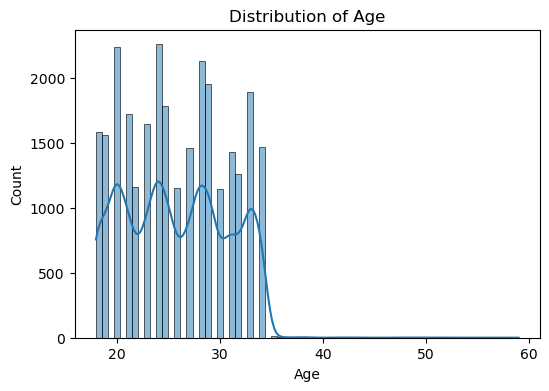

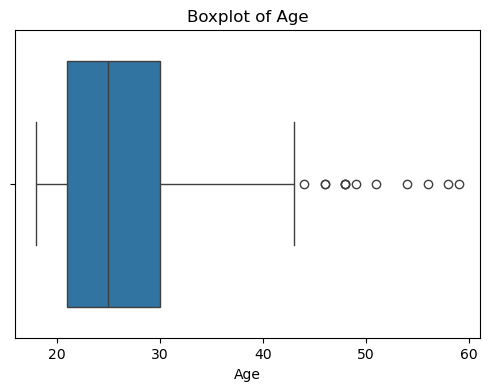

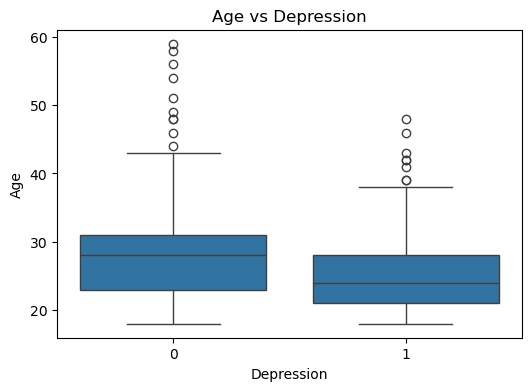

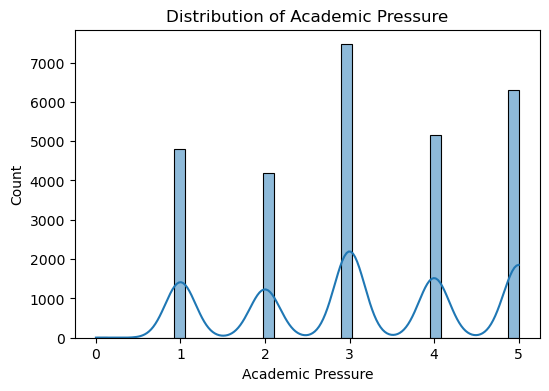

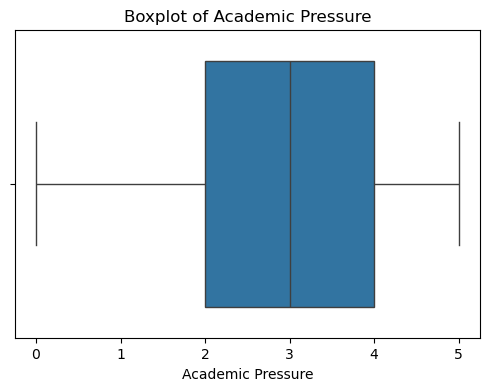

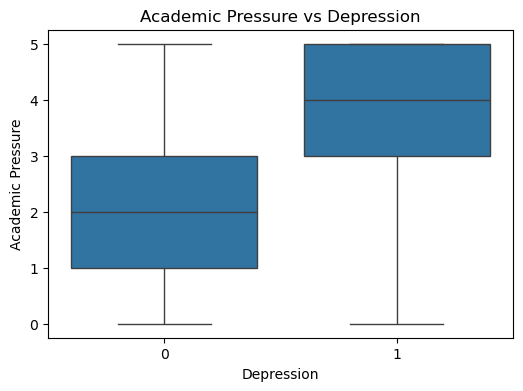

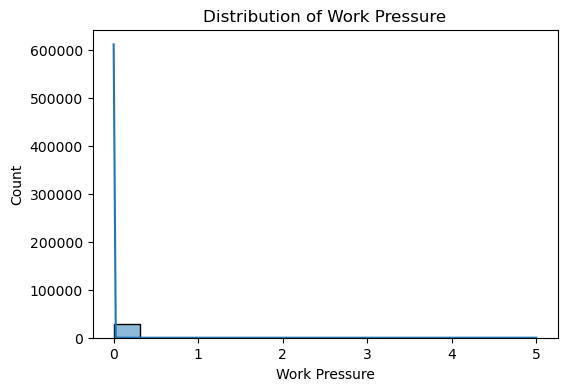

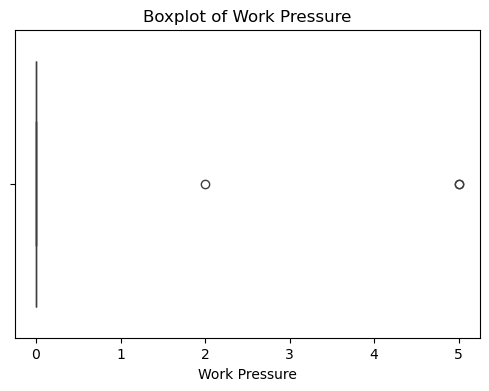

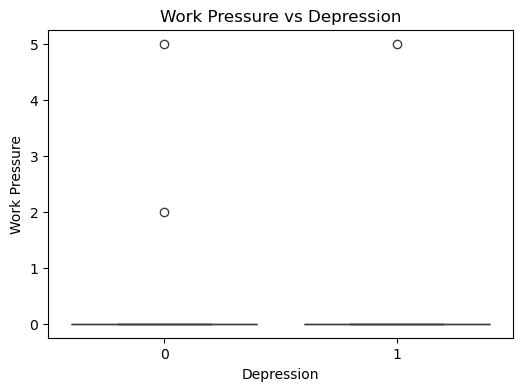

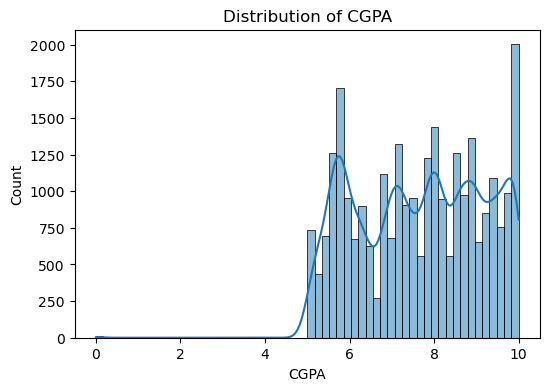

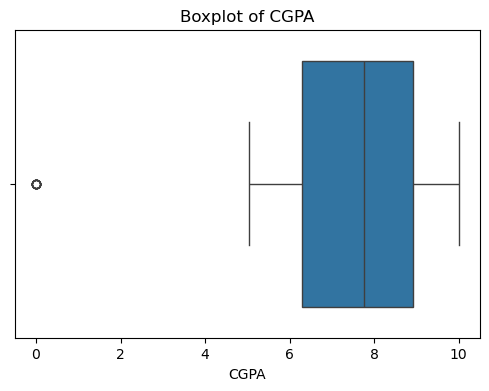

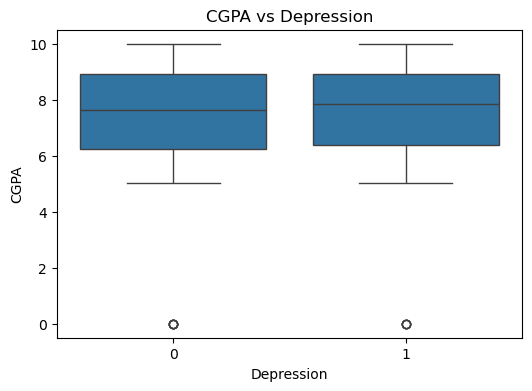

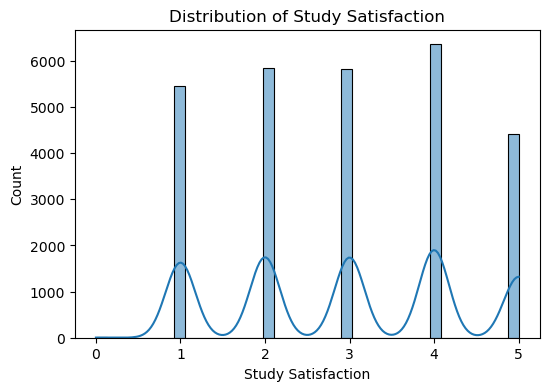

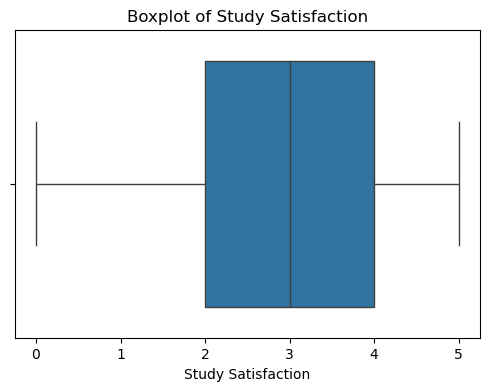

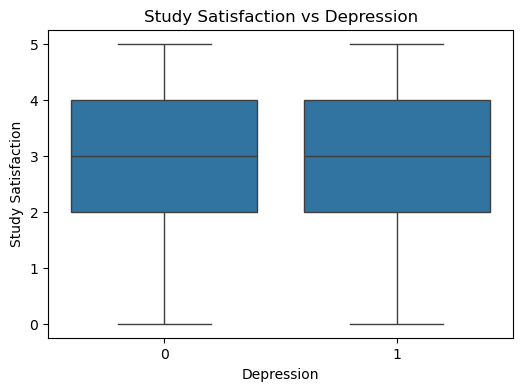

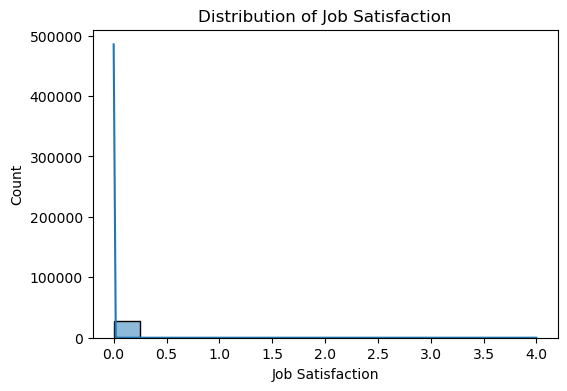

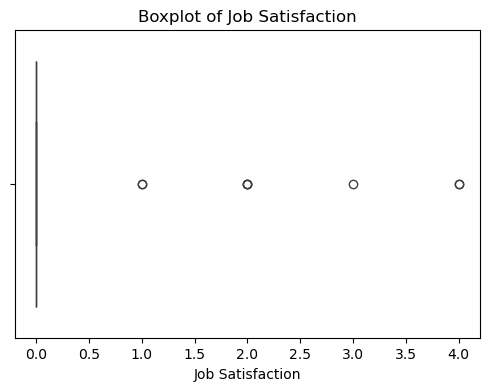

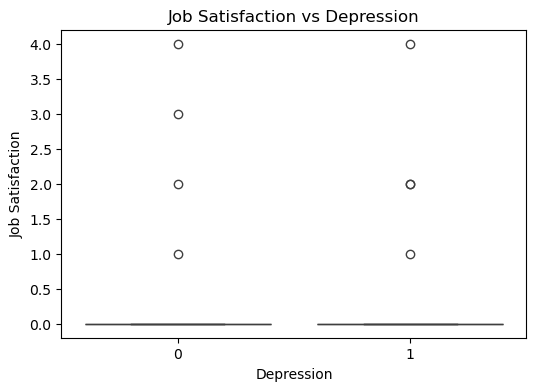

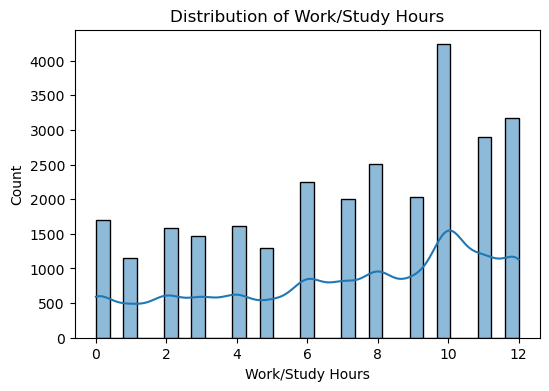

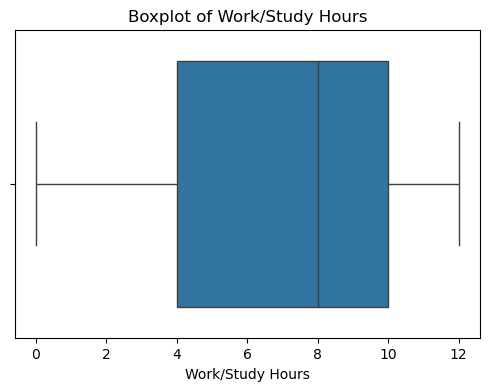

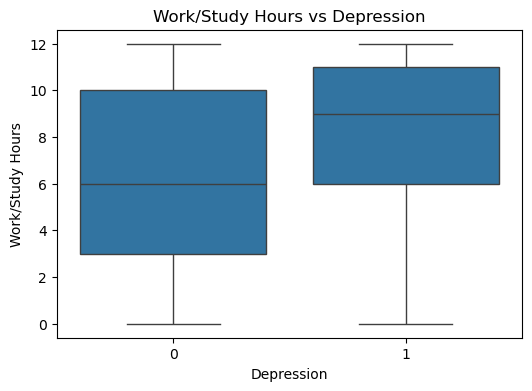

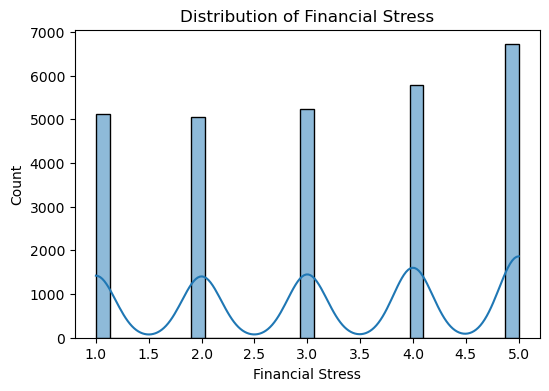

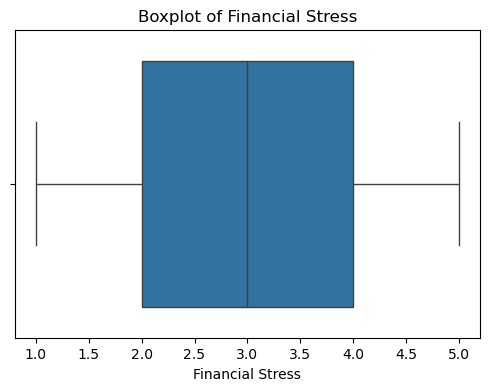

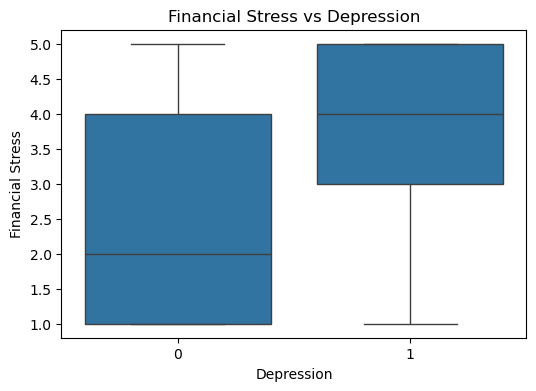

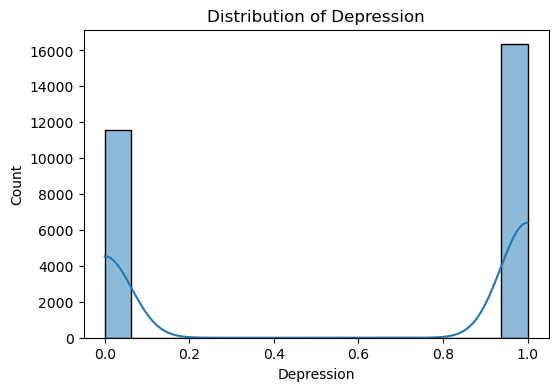

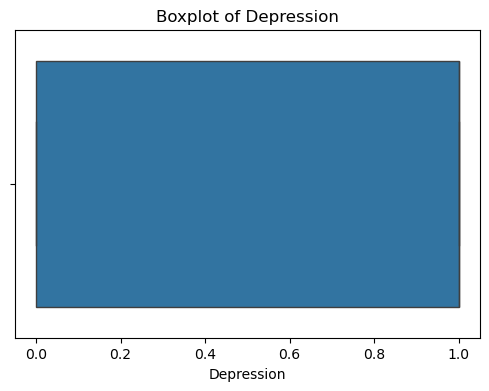

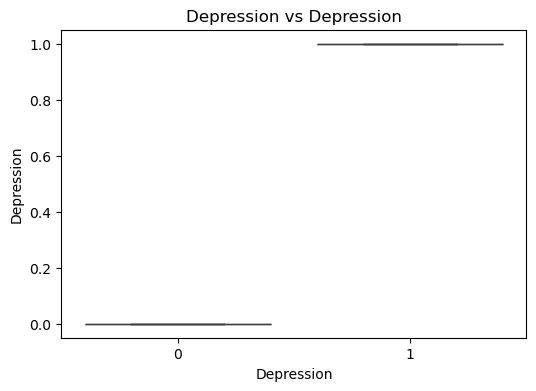

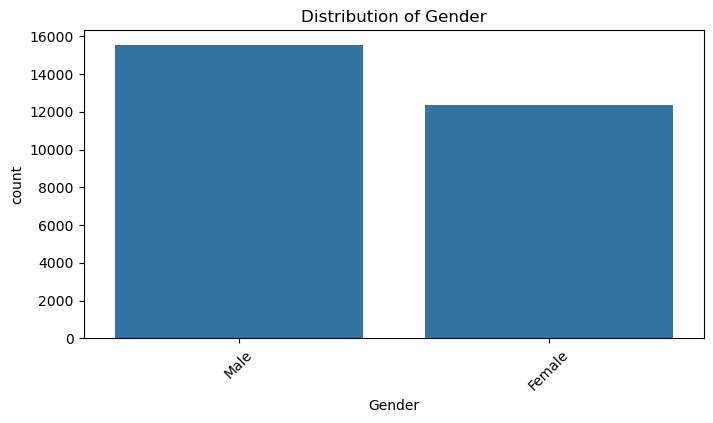

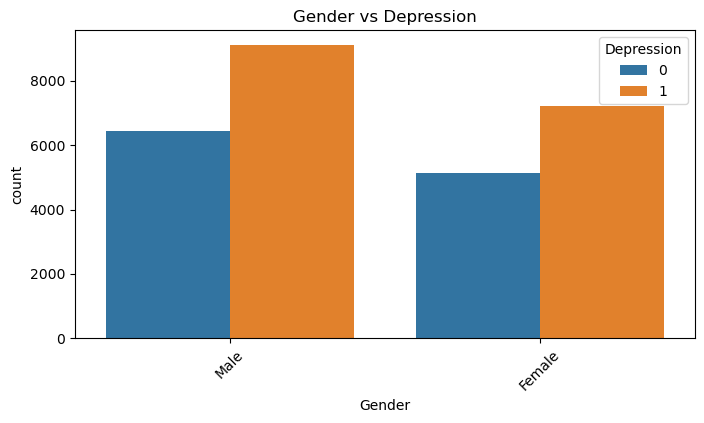

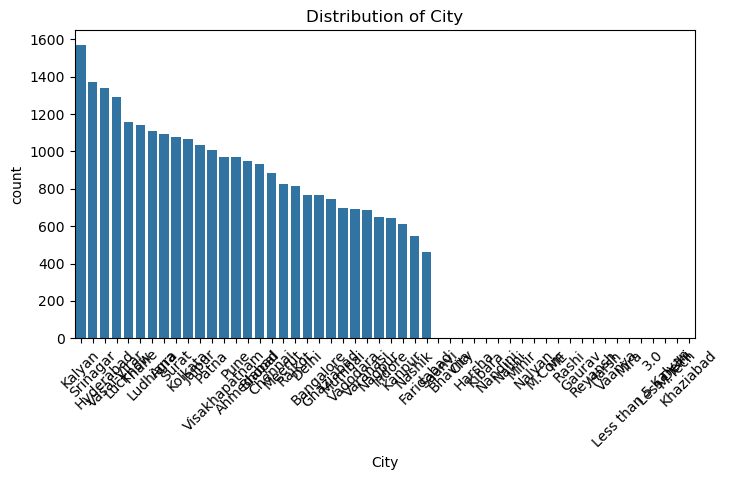

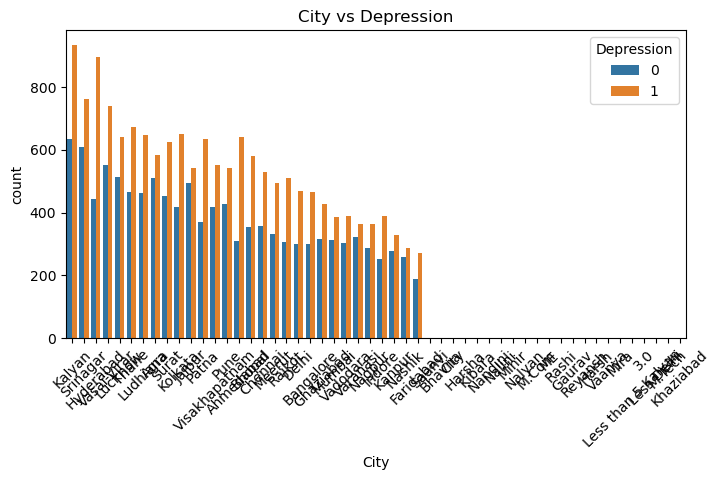

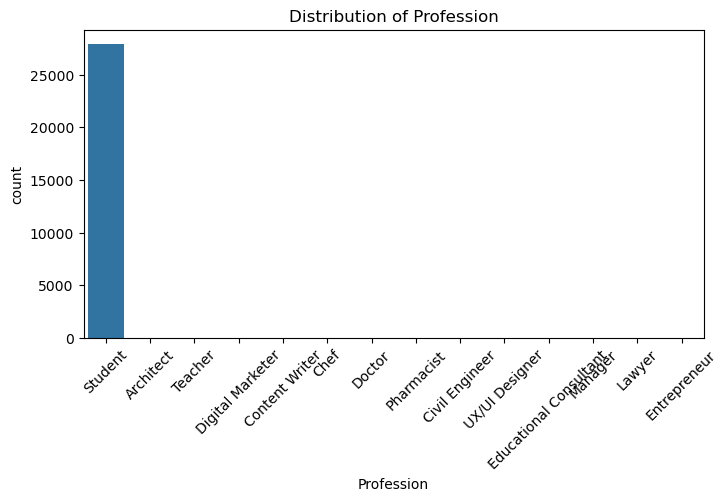

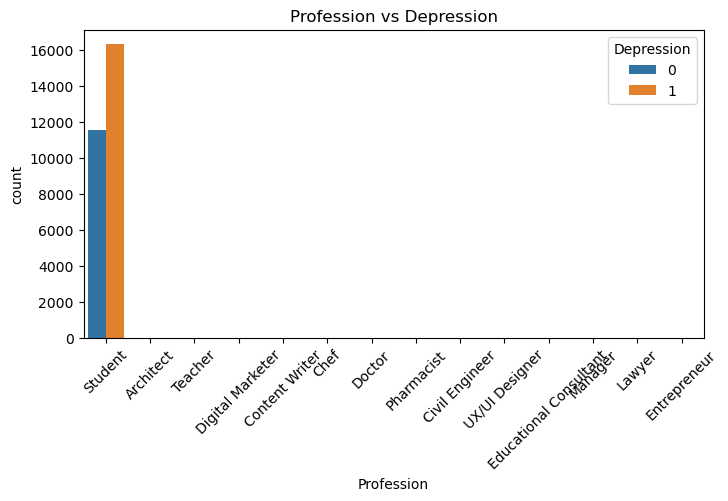

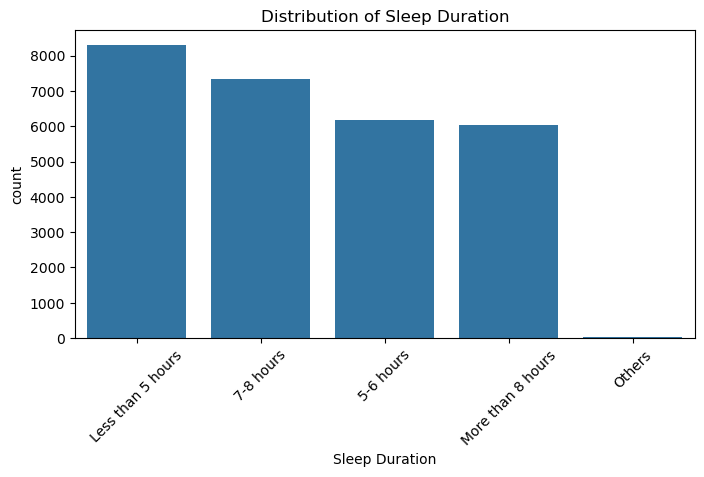

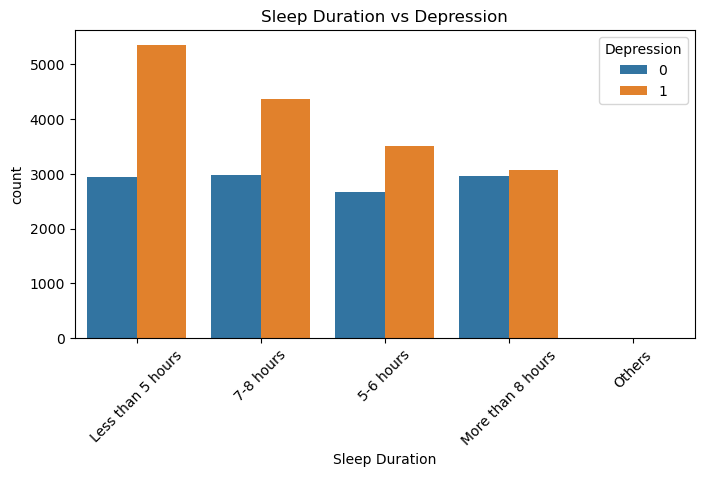

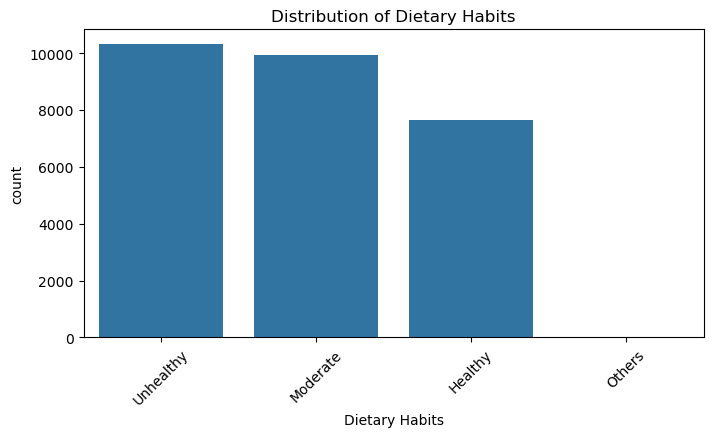

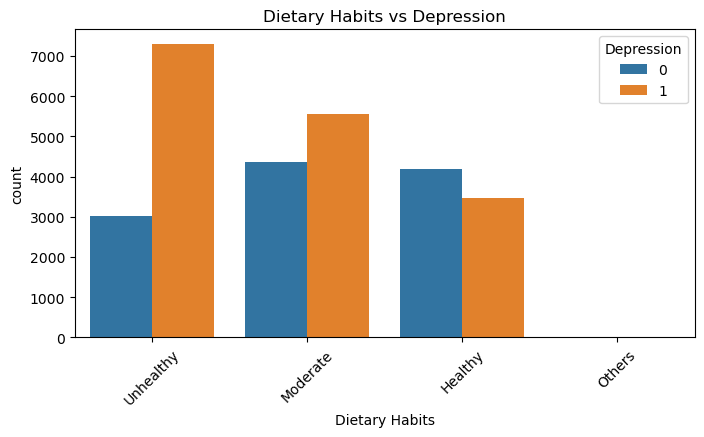

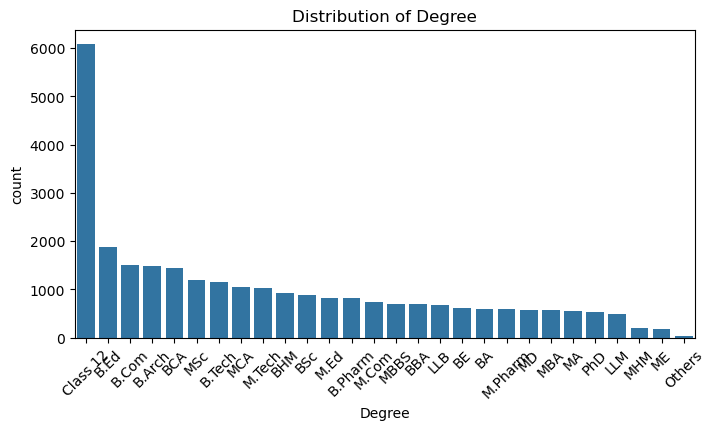

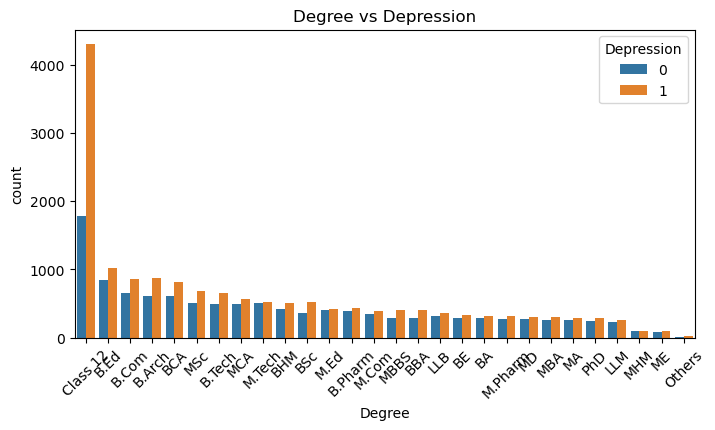

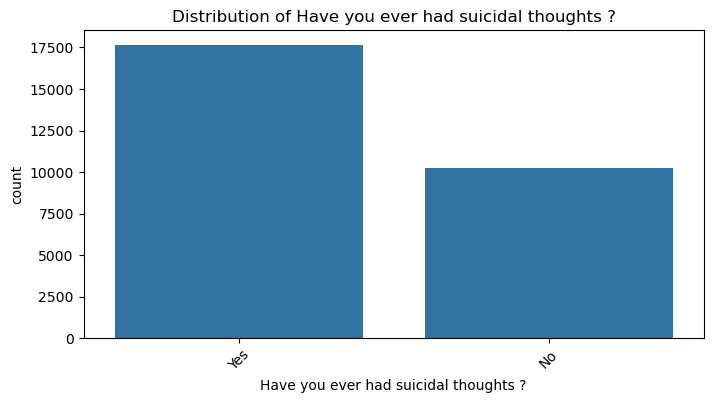

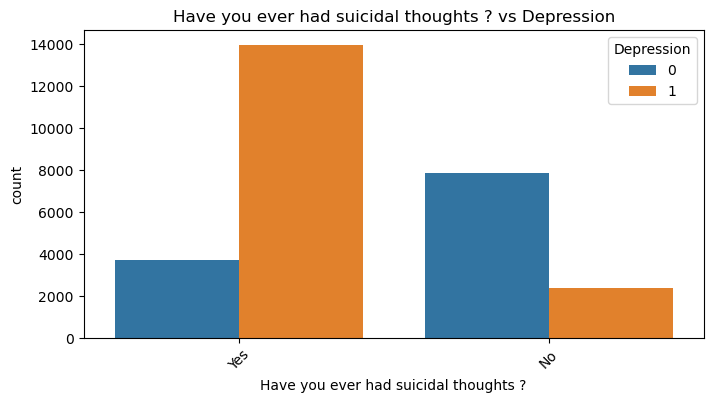

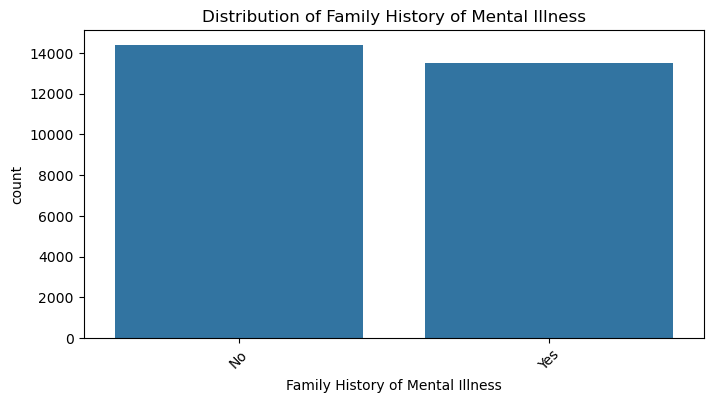

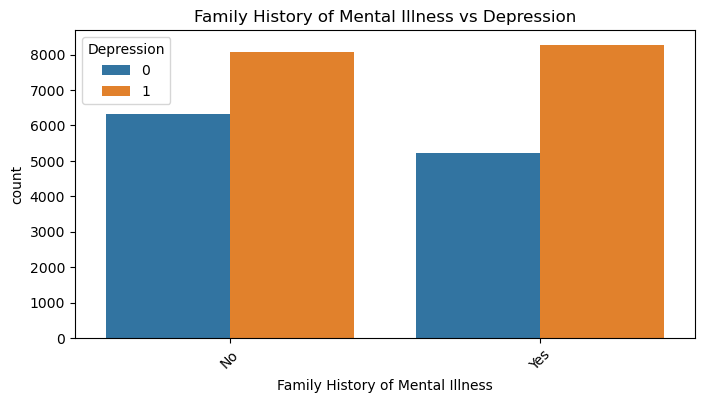

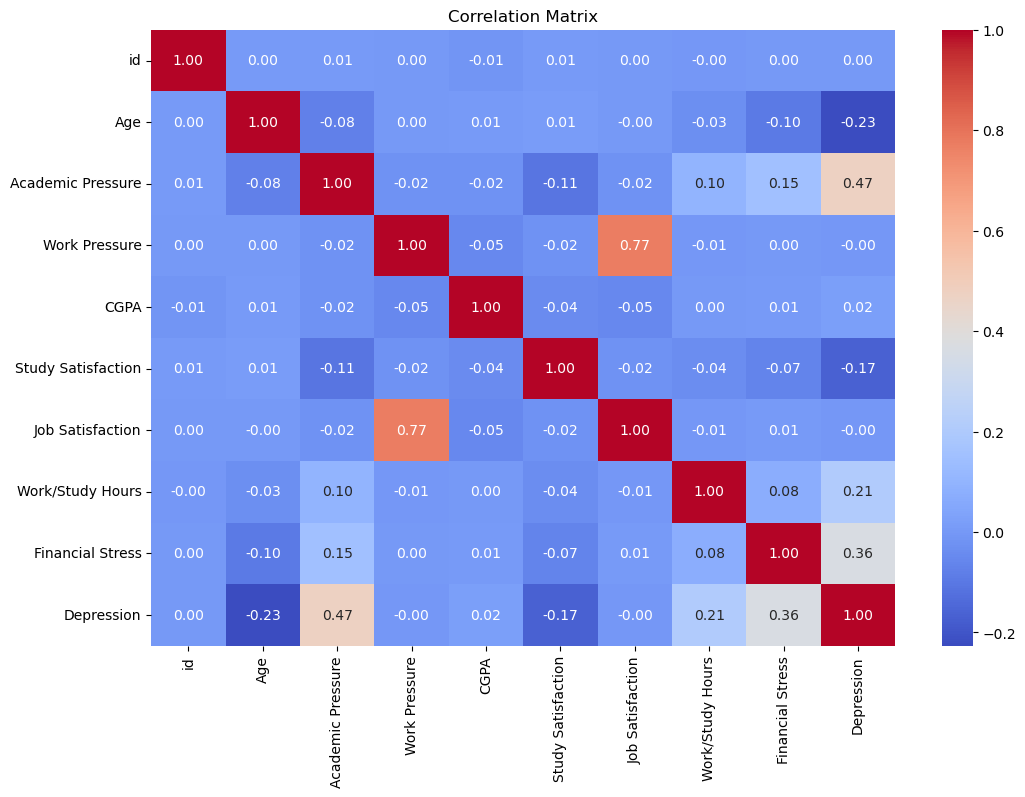

In [4]:
target_col = 'Depression'
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df)
    plt.title(f'Distribution of {target_col}')
    plt.show()

    target_counts = df[target_col].value_counts(normalize=True)
    print(f"Class distribution:\n{target_counts}")

# Numerical Features Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Boxplot for outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Analyze relationship with target
    if target_col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.show()

# Categorical Features Analysis
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze relationship with target
    if target_col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue=target_col, data=df, order=df[col].value_counts().index)
        plt.title(f'{col} vs {target_col}')
        plt.xticks(rotation=45)
        plt.show()

# Correlation Analysis
df_numerical = df[numerical_columns].dropna()
if len(df_numerical.columns) > 1:
    plt.figure(figsize=(12, 8))
    corr_matrix = df_numerical.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


Checking for data quality issues:

In [5]:
# duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates dropped.")

# outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Number of outliers in {col}: {outliers}")

# Inconsistent values
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Number of duplicate rows: 0
Number of outliers in id: 0
Number of outliers in Age: 12
Number of outliers in Academic Pressure: 0
Number of outliers in Work Pressure: 3
Number of outliers in CGPA: 9
Number of outliers in Study Satisfaction: 0
Number of outliers in Job Satisfaction: 8
Number of outliers in Work/Study Hours: 0
Number of outliers in Financial Stress: 0
Number of outliers in Depression: 0
Unique values in Gender: ['Male' 'Female']
Unique values in City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Unique values in 

From the data exploration above we notice that some columns are not necessary for our analysis (id, Profession, Work Pressure, Job Satisfaction). So we remove them from the `df`: 

In [6]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['Profession'], axis=1, inplace=True)
df.drop(['Work Pressure'], axis=1, inplace=True)
df.drop(['Job Satisfaction'], axis=1, inplace=True)
df.drop(['City'], axis=1, inplace=True)

In [7]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In our dataset we have some columns with categorical data, but for machine learning process we will use algotithms that require numeric data: 

In [8]:
def convert_column_to_numeric(df, col):
    value_to_number = {}
    if 'Male' in df[col].values:
        value_to_number['Male'] = 0
    if 'Female' in df[col].values:
        value_to_number['Female'] = 1
        
    if 'Yes' in df[col].values and 'No' in df[col].values:
        value_to_number['Yes'] = 1
        value_to_number['No'] = 0

    if 'Healthy' in df[col].values:
        value_to_number['Healthy'] = 2
    if 'Moderate' in df[col].values:
        value_to_number['Moderate'] = 1
    if 'Unhealthy' in df[col].values:
        value_to_number['Unhealthy'] = 0

    unique_values = df[col].unique()
    for value in enumerate(unique_values):
        if value not in value_to_number:
            value_to_number[value] = len(value_to_number)

    df[col] = df[col].map(value_to_number)

    return df, value_to_number

In [9]:
# convert categorical data
convert_column_to_numeric(df, 'Gender') # Male 0, Female 1
convert_column_to_numeric(df, 'Dietary Habits')
convert_column_to_numeric(df, 'Have you ever had suicidal thoughts ?')
convert_column_to_numeric(df, 'Family History of Mental Illness')

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,5.0,8.97,2.0,5-6 hours,2.0,B.Pharm,1,3.0,1.0,0,1
1,1,24.0,2.0,5.90,5.0,5-6 hours,1.0,BSc,0,3.0,2.0,1,0
2,0,31.0,3.0,7.03,5.0,Less than 5 hours,2.0,BA,0,9.0,1.0,1,0
3,1,28.0,3.0,5.59,2.0,7-8 hours,1.0,BCA,1,4.0,5.0,1,1
4,1,25.0,4.0,8.13,3.0,5-6 hours,1.0,M.Tech,1,1.0,1.0,0,0


For Sleep Duration column we apply a different conversion:

In [10]:
convert = {
    '5-6 hours': 5.5,
    'Less than 5 hours': 4.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 8.5,
    'Others': 0
}

df['Sleep Duration'] = df['Sleep Duration'].map(convert)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Sleep Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27901 entries, 0 to 27900
Series name: Sleep Duration
Non-Null Count  Dtype  
--------------  -----  
27901 non-null  float64
dtypes: float64(1)
memory usage: 218.1 KB


Also for the degree we apply a different conversion according to the grade:
* 0 for Diploma
* 1 for Bachelor degree
* 2 for Master degree
* 3 for PhD

In [11]:
mapping = {'C': 0, 'B': 1, 'L': 1, 'M': 2, 'P': 3}

def transform_feature(feature):
    first_letter = feature[0]
    return mapping.get(first_letter, -1)

df['Degree'] = df['Degree'].apply(transform_feature)

In [12]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,5.0,8.97,2.0,5.5,2.0,1,1,3.0,1.0,0,1
1,1,24.0,2.0,5.90,5.0,5.5,1.0,1,0,3.0,2.0,1,0
2,0,31.0,3.0,7.03,5.0,4.5,2.0,1,0,9.0,1.0,1,0
3,1,28.0,3.0,5.59,2.0,7.5,1.0,1,1,4.0,5.0,1,1
4,1,25.0,4.0,8.13,3.0,5.5,1.0,2,1,1.0,1.0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   CGPA                                   27901 non-null  float64
 4   Study Satisfaction                     27901 non-null  float64
 5   Sleep Duration                         27901 non-null  float64
 6   Dietary Habits                         27889 non-null  float64
 7   Degree                                 27901 non-null  int64  
 8   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 9   Work/Study Hours                       27901 non-null  float64
 10  Financial Stress                       27898 non-null  float64
 11  Fa

We check if we have any empty cell in our data and get rid of them:

In [14]:
df.isna().sum()

Gender                                    0
Age                                       0
Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Sleep Duration                            0
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

We convert some features from float to int:

In [16]:
df['Age'] = df['Age'].astype(int)
df['Academic Pressure'] = df['Academic Pressure'].astype(int)
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int)
df['Work/Study Hours'] = df['Work/Study Hours'].astype(int)
df['Financial Stress'] = df['Financial Stress'].astype(int)

In [17]:
unique = df.nunique()
print(unique)

Gender                                     2
Age                                       34
Academic Pressure                          6
CGPA                                     332
Study Satisfaction                         6
Sleep Duration                             5
Dietary Habits                             3
Degree                                     5
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64


We save the dataset into a new csv file:

In [18]:
df.to_csv('cleaned_dataset.csv', index=False)

# Machine Learing

We will create some machine learning models that will classify if students have depression or not. Our classifiers will be:
* Decision Tree
* Random Forest
* KNN

In [19]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,5,8.97,2,5.5,2.0,1,1,3,1,0,1
1,1,24,2,5.90,5,5.5,1.0,1,0,3,2,1,0
2,0,31,3,7.03,5,4.5,2.0,1,0,9,1,1,0
3,1,28,3,5.59,2,7.5,1.0,1,1,4,5,1,1
4,1,25,4,8.13,3,5.5,1.0,2,1,1,1,0,0


In [20]:
# split the data
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Train Decision Tree Classifier

Accuracy Score: 0.8244890641807099
Recall Score: 0.8244890641807099
F1 Score: 0.8234466789030825


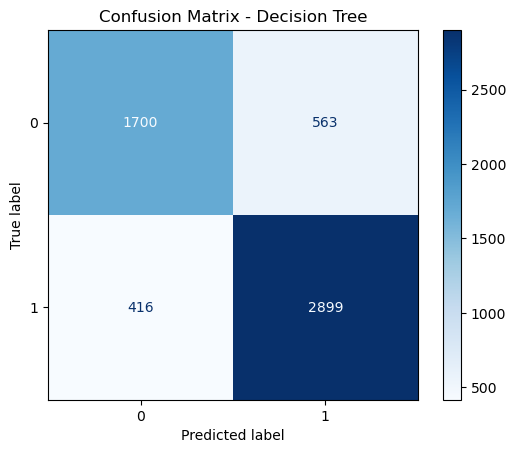

In [23]:
params = {'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 4, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4, 5, 6]}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5).fit(X_train, y_train)

dtc = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat_dtc = dtc.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_hat_dtc)
dtc_recall = recall_score(y_test, y_hat_dtc, average='weighted')
dtc_f1 = f1_score(y_test, y_hat_dtc, average='weighted')

print(f'''Accuracy Score: {dtc_accuracy}
Recall Score: {dtc_recall}
F1 Score: {dtc_f1}''')

# Matrice di confusione per Decision Tree
cm = confusion_matrix(y_test, y_hat_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Random Forest Classifier

Accuracy Score: 0.840086052348512
Recall Score: 0.840086052348512
F1 Score: 0.8391582350814435


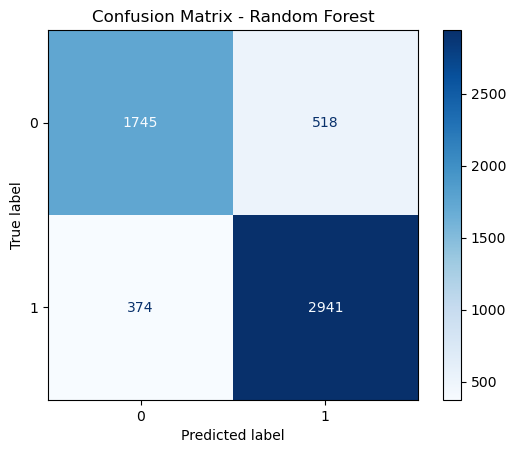

In [24]:
rfc = RandomForestClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat_rfc = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_hat_rfc)
rfc_recall = recall_score(y_test, y_hat_rfc, average='weighted')
rfc_f1 = f1_score(y_test, y_hat_rfc, average='weighted')

print(f'''Accuracy Score: {rfc_accuracy}
Recall Score: {rfc_recall}
F1 Score: {rfc_f1}''')

cm = confusion_matrix(y_test, y_hat_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

K-Nearest Neighbors Classifier

Accuracy Score: 0.8241305127285765
Recall Score: 0.8241305127285765
F1 Score: 0.8222877575481584


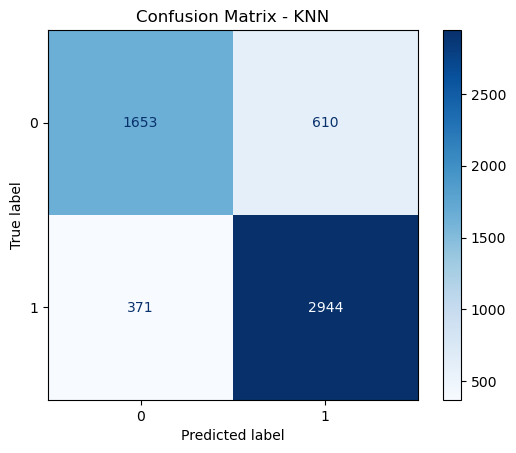

In [25]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5).fit(X_train, y_train)

knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_hat_knn)
knn_recall = recall_score(y_test, y_hat_knn, average='weighted')
knn_f1 = f1_score(y_test, y_hat_knn, average='weighted')

print(f'''Accuracy Score: {knn_accuracy}
Recall Score: {knn_recall}
F1 Score: {knn_f1}''')

cm = confusion_matrix(y_test, y_hat_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

Cross-Validation to evaluate generalization:

In [28]:
cv_scores = {
    'Decision Tree': cross_val_score(dtc, X, y, cv=5, scoring='accuracy').mean(),
    'Random Forest': cross_val_score(rfc, X, y, cv=5, scoring='accuracy').mean(),
    'KNN': cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
}

print("Cross-Validation Scores:")
for model, score in cv_scores.items():
    print(f"{model}: {score}")

Cross-Validation Scores:
Decision Tree: 0.8220970688852752
Random Forest: 0.8352579323481493
KNN: 0.8224561218079712


For selecting the best model we will create a graph and see performance evaluation:

In [305]:
scores = {'Decision Tree': [dtc_accuracy, dtc_recall, dtc_f1],
          'Random Forest': [rfc_accuracy, rfc_recall, rfc_f1],
          'K-Nearest Neighbors': [knn_accuracy, knn_recall, knn_f1]}

scores_table = pd.DataFrame(scores)
scores_table.index = ['Accuracy', 'Recall', 'F1']
scores_table.head()

,Decision Tree,Random Forest,K-Nearest Neighbors
Accuracy,0.824489,0.839010,0.824131
Recall,0.824489,0.839010,0.824131
F1,0.823447,0.837789,0.822288


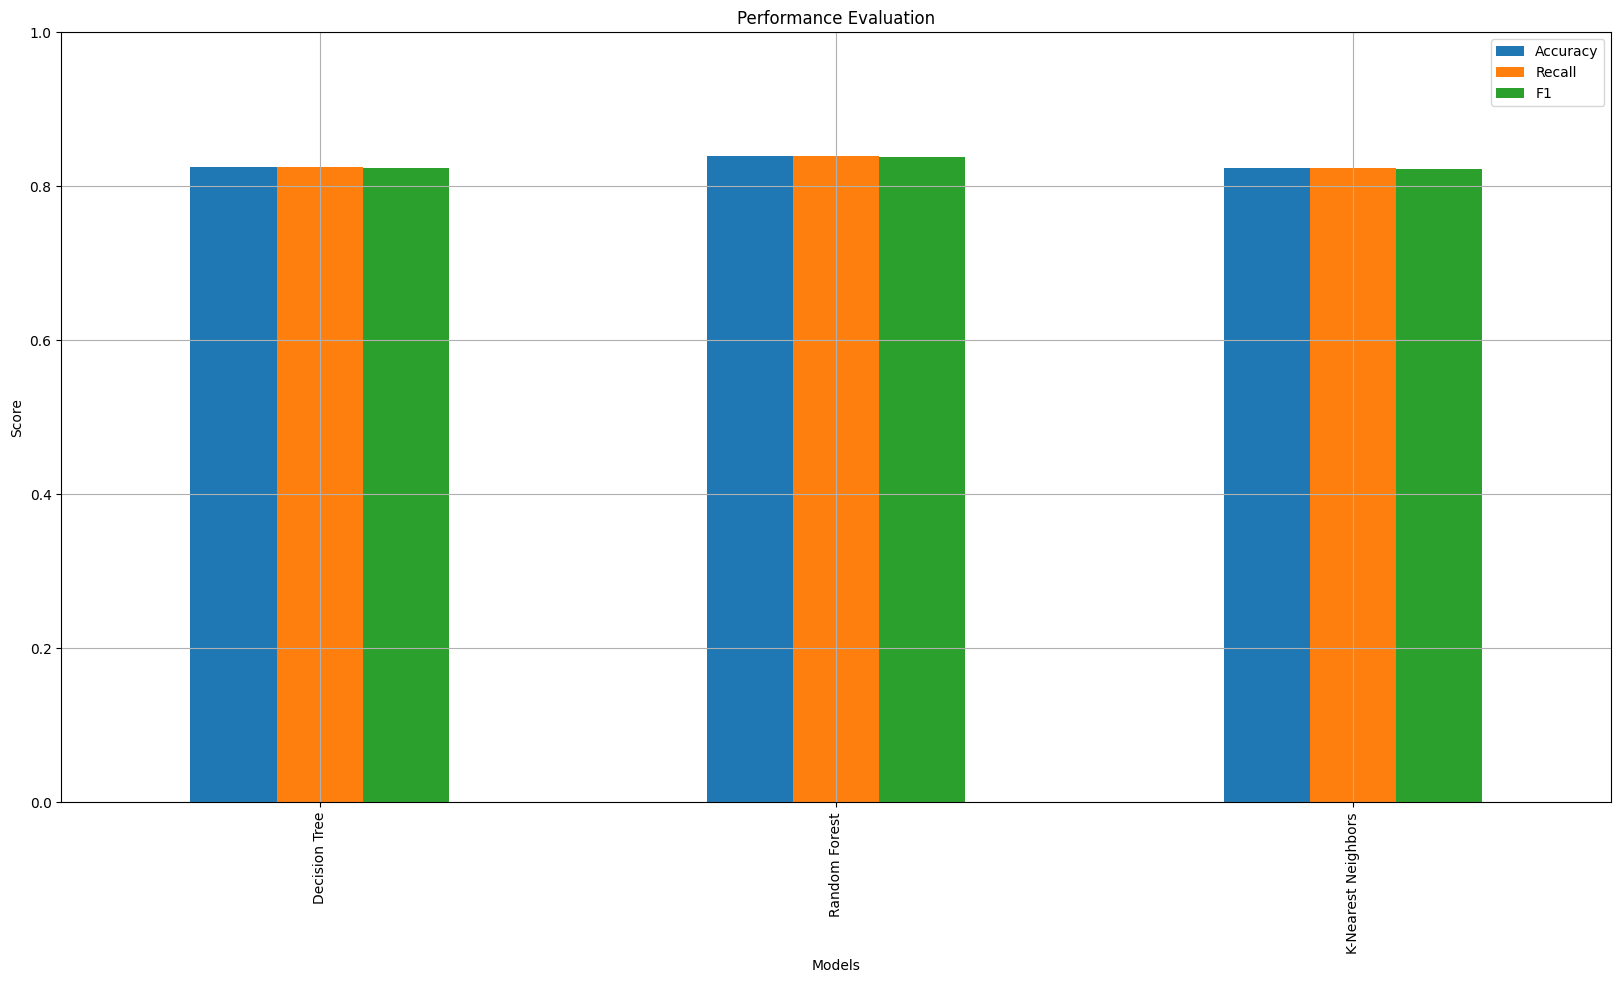

In [306]:
scores_table.T.plot(kind='bar', figsize=(20, 10))
plt.title('Performance Evaluation')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim([0,1])
plt.grid()
plt.show()

From results, we can see that we generally have scores above 80% so our models are all successful. The best performance index however is Random Forest so we will select it for our project.